In [1]:
import pyarrow.parquet as pq
import pandas as pd


file_1_path = '0000.parquet'
file_2_path = '0001.parquet'


df1 = pd.read_parquet(file_1_path)
df2 = pd.read_parquet(file_2_path)


combined_df = pd.concat([df1, df2], ignore_index=True)



data_types = combined_df.dtypes



memory_usage = combined_df.memory_usage(deep=True).sum()

In [2]:
print(data_types)

sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object


In [3]:
print(memory_usage)

2945080851


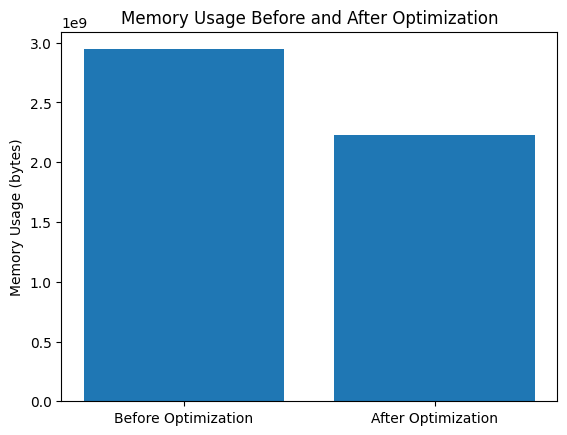

In [4]:
import matplotlib.pyplot as plt


def optimize_types(df):


    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float')

    for col in df.select_dtypes(include=['int']):

        df[col] = pd.to_numeric(df[col], downcast='integer')


    for col in df.select_dtypes(include=['object']):
        num_unique_values = len(df[col].unique())
        num_total_values = len(df[col])

        if num_unique_values / num_total_values < 0.5:
            df[col] = df[col].astype('category')
    return df



# Wczytanie plików i scalenie w jeden DataFrame

df1 = pd.read_parquet('0000.parquet')
df2 = pd.read_parquet('0001.parquet')
combined_df = pd.concat([df1, df2], ignore_index=True)



# Pierwsze zużycie pamięci
memory_usage_before = combined_df.memory_usage(deep=True).sum()



# Optymalizacja typów danych
optimized_df = optimize_types(combined_df)



# Zużycie pamięci po optymalizacji
memory_usage_after = optimized_df.memory_usage(deep=True).sum()


labels = ['Before Optimization', 'After Optimization']
memory_usage_values = [memory_usage_before, memory_usage_after]



plt.bar(labels, memory_usage_values)
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage Before and After Optimization')
plt.show()

In [5]:
combined_df = pd.concat([df1, df2], ignore_index=True)

csv_file_path = 'combined_dataframe.csv'
combined_df.to_csv(csv_file_path, index=False)
print(csv_file_path)

combined_dataframe.csv


In [6]:
import time

# Zmierz czas wczytania całego pliku CSV naraz
start_time = time.time()
df = pd.read_csv('combined_dataframe.csv')
end_time = time.time()

print(f"Czas wczytania całego pliku naraz: {end_time - start_time:.4f} sekund")

Czas wczytania całego pliku naraz: 17.6163 sekund


In [7]:
chunksize = 100000  # Przykładowa wartość

start_time = time.time()
df_chunks = pd.read_csv('combined_dataframe.csv', chunksize=chunksize)

# Łączenie wczytanych kawałków w jedną ramkę danych
df = pd.concat(df_chunks)
end_time = time.time()

print(f"Czas wczytania pliku z użyciem chunksize={
      chunksize}: {end_time - start_time:.4f} sekund")

Czas wczytania pliku z użyciem chunksize=100000: 22.8138 sekund


In [8]:
import os


def split_csv(file_path, rows_per_chunk, output_dir):
    df = pd.read_csv(file_path)
    os.makedirs(output_dir, exist_ok=True)

    for i, chunk in enumerate(range(0, len(df), rows_per_chunk)):
        chunk_df = df.iloc[chunk:chunk+rows_per_chunk]
        chunk_file = os.path.join(output_dir, f'chunk_{i}.csv')
        chunk_df.to_csv(chunk_file, index=False)


# Podział pliku na fragmenty, np. po 100000 wierszy
split_csv('combined_dataframe.csv',
          rows_per_chunk=100000, output_dir='chunks')